# Imports

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dbtools import dbtools as dbt
from tqdm import tqdm
import ast

# Data

## Load datasets table

In [81]:
datasets_table = dbt.relation_metadata('datasets','registrations','dataset_registrations')

datasets_table.columns

Index(['id_dataset', 'file_path_dataset', 'description_dataset',
       'datasettype_id_dataset', 'rows_dataset', 'patch_size_dataset',
       'reconstruction_shape_dataset', 'target_dataset', 'id_registration',
       'reference_measurement_id_registration',
       'registered_measurement_id_registration',
       'registration_matrix_registration', 'type_registration',
       'axes_registration'],
      dtype='object')

# load panel

In [82]:
panels_table = dbt.get_data_metadata('panels')
samples_table = dbt.get_data_metadata('samples')
measurement_types_table = dbt.get_data_metadata('measurementtypes')
measurements_table = dbt.relation_metadata('measurements','samples','sample_measurements')

#join panels with samples
panels_samples_table = pd.merge(panels_table, samples_table, left_on='id_panel', right_on='panel_id_sample', how='inner')

panels_samples_table = panels_samples_table[panels_samples_table['id_panel'] == 4]

#join measurements with measurement types
measurements_table = pd.merge(measurements_table, measurement_types_table, left_on='measurementtype_id_measurement', right_on='id_measurementtype', how='inner')

measurements_table = measurements_table[measurements_table['id_sample'].isin(panels_samples_table['id_sample'])]

measurements_table

,id_measurement,file_path_measurement,parent_measurement_id_measurement,measurementtype_id_measurement,height_measurement,width_measurement,depth_measurement,dtype_measurement,file_type_measurement,signal_type_measurement,...,current_measurementtype,voxel_size_measurementtype,images_taken_per_projection_measurementtype,exposure_time_per_image_taken_measurementtype,binning_measurementtype,projections_measurementtype,target_measurementtype,filter_measurementtype,Detector_measurementtype,DAC_measurementtype
38,123,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,NaN,7,448 cardinal,250 cardinal,424 cardinal,uint8 nominal,.tif nominal,RF nominal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[10.1,4.33],[12.1,6.18],[19.7,10.38],[26.7,15..."
39,123,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,NaN,7,448 cardinal,250 cardinal,424 cardinal,uint8 nominal,.tif nominal,RF nominal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[10.1,4.33],[12.1,6.18],[19.7,10.38],[26.7,15..."
40,123,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,NaN,7,448 cardinal,250 cardinal,424 cardinal,uint8 nominal,.tif nominal,RF nominal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[10.1,4.33],[12.1,6.18],[19.7,10.38],[26.7,15..."
41,123,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,NaN,7,448 cardinal,250 cardinal,424 cardinal,uint8 nominal,.tif nominal,RF nominal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[10.1,4.33],[12.1,6.18],[19.7,10.38],[26.7,15..."
42,123,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,NaN,7,448 cardinal,250 cardinal,424 cardinal,uint8 nominal,.tif nominal,RF nominal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[10.1,4.33],[12.1,6.18],[19.7,10.38],[26.7,15..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,236,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,212.0,6,294 cardinal,2972 cardinal,1730 cardinal,uint8 string,tif string,NaN,...,90 uA,0.025 mm,5 cardinal,0.2 s,1 cardinal,3738 cardinal,wolframio nominal,LE1 nominal,Flat Panel nominal,NaN
186,237,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,215.0,6,230 cardinal,3203 cardinal,1680 cardinal,uint8 string,tif string,NaN,...,90 uA,0.025 mm,5 cardinal,0.2 s,1 cardinal,3738 cardinal,wolframio nominal,LE1 nominal,Flat Panel nominal,NaN
187,238,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,216.0,6,230 cardinal,3207 cardinal,1743 cardinal,uint8 string,tif string,NaN,...,90 uA,0.025 mm,5 cardinal,0.2 s,1 cardinal,3738 cardinal,wolframio nominal,LE1 nominal,Flat Panel nominal,NaN
188,239,\\192.168.10.106\imdea\DataDriven_UT_AlbertoVi...,217.0,6,235 cardinal,3211 cardinal,1722 cardinal,uint8 string,tif string,NaN,...,90 uA,0.025 mm,5 cardinal,0.2 s,1 cardinal,3738 cardinal,wolframio nominal,LE1 nominal,Flat Panel nominal,NaN


In [83]:
registrations_table = dbt.relation_metadata('registrations','datasets','dataset_registrations')

datasets_table = datasets_table[datasets_table['reference_measurement_id_registration'].isin(measurements_table['id_measurement'])]
datasets_table = datasets_table[datasets_table['registered_measurement_id_registration'].isin(measurements_table['id_measurement'])]

print(f"Found {len(registrations_table)} registrations")

Found 116 registrations


## Load datasets

In [84]:
#load 2025 datasets
datasets_table = datasets_table[datasets_table['datasettype_id_dataset'] == 3]

datasets = []

for idx, row in datasets_table.iterrows():
    if row['patch_size_dataset'] != '7 pixels':
        continue
    dataset_path = row['file_path_dataset']
    print(f"Loading dataset: {dataset_path}")
    continue
    df = pd.read_csv(dataset_path)
    datasets.append(df)

Loading dataset: \\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\04_ML_data\Airbus\Panel Pegaso\2025 dataset\1.7\patch_size_7_volfrac_areafrac.csv
Loading dataset: \\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\04_ML_data\Airbus\Panel Pegaso\2025 dataset\1.8\patch_size_7_volfrac_areafrac.csv
Loading dataset: \\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\04_ML_data\Airbus\Panel Pegaso\2025 dataset\1.9\patch_size_7_volfrac_areafrac.csv
Loading dataset: \\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\04_ML_data\Airbus\Panel Pegaso\2025 dataset\1.10\patch_size_7_volfrac_areafrac.csv
Loading dataset: \\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\04_ML_data\Airbus\Panel Pegaso\2025 dataset\1.11\patch_size_7_volfrac_areafrac.csv
Loading dataset: \\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\04_ML_data\Airbus\Panel Pegaso\2025 dataset\1.12\patch_size_7_volfrac_areafrac.csv
Loading dataset: \\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\04_ML_data\Airbus\Pane

# Compare datasets

## General comparison

In [45]:
volfrac = []

for df in datasets:
    volfrac.append(df['volfrac'].values)

volfrac = np.concatenate(volfrac)

### -1 indexes

In [46]:
invalid_indexes = np.where(volfrac == -1)[0]
valid_indexes = np.where(volfrac != -1)[0]

print(f"Number of -1 indexes in 2025 datasets: {len(invalid_indexes)}")

Number of -1 indexes in 2025 datasets: 1097


### Distribution statistycals

In [47]:
from scipy import stats
import numpy as np

# Extract valid volfrac values for both datasets
volfrac_valid = volfrac[valid_indexes]

# Calculate descriptive statistics
mean = np.mean(volfrac_valid)
std = np.std(volfrac_valid, ddof=1)
n = len(volfrac_valid)

print("Descriptive Statistics:")
print(f"2025 Dataset: Mean = {mean:.4f}, Std = {std:.4f}, N = {n}")

Descriptive Statistics:
2025 Dataset: Mean = 0.0072, Std = 0.0071, N = 14604


### Histograms

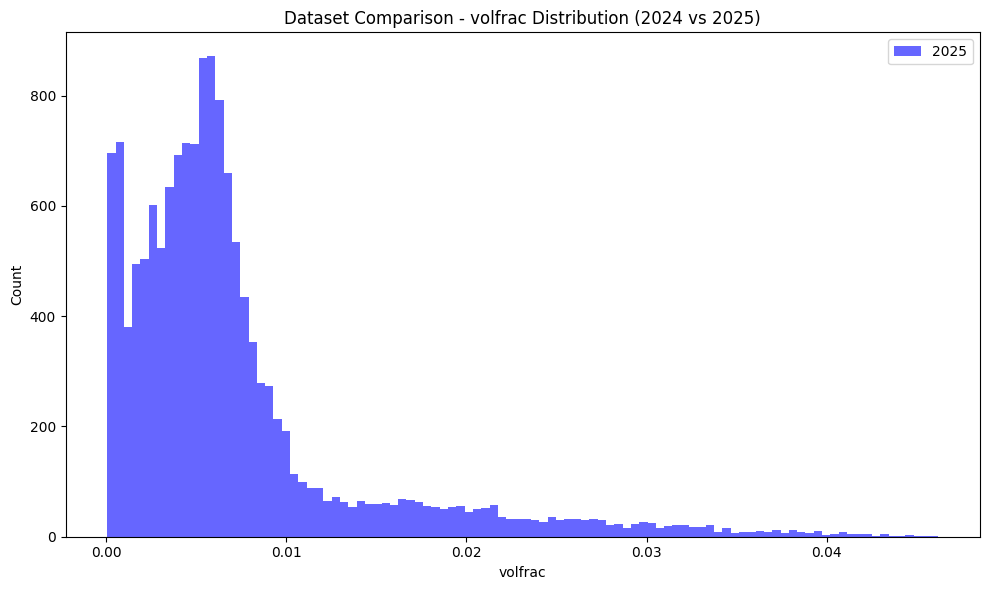

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot both histograms on the same axis
ax.hist(volfrac[valid_indexes], bins=100, alpha=0.6, color='blue', label='2025', density=False)

ax.set_xlabel('volfrac')
ax.set_ylabel('Count')
ax.set_title('Dataset Comparison - volfrac Distribution (2024 vs 2025)')
ax.legend()

plt.tight_layout()
plt.show()

## sample wise comparison

## load registrations

## load datset ids

In [49]:
datasets_ids = []

for idx, row in datasets_table.iterrows():
    if row['patch_size_dataset'] != '7 pixels':
        continue
    dataset_id = row['id_dataset']
    datasets_ids.append(dataset_id)

## get sample ids

In [52]:
registration_table = registrations_table[registrations_table['id_dataset'].isin(datasets_ids)]

In [53]:
sample_names = []

for idx, row in registration_table.iterrows():

    measurement_id = row['registered_measurement_id_registration']

    sample_name = measurements_table[measurements_table['id_measurement'] == measurement_id]['name_sample'].values[0]

    print(f"Measurement ID: {measurement_id}, Sample Name: {sample_name}")

    sample_names.append(sample_name)

Measurement ID: 132, Sample Name: 1.7
Measurement ID: 133, Sample Name: 1.8
Measurement ID: 134, Sample Name: 1.9
Measurement ID: 146, Sample Name: 1.10
Measurement ID: 147, Sample Name: 1.11
Measurement ID: 148, Sample Name: 1.12
Measurement ID: 149, Sample Name: 1.13


## Plotting sample wise

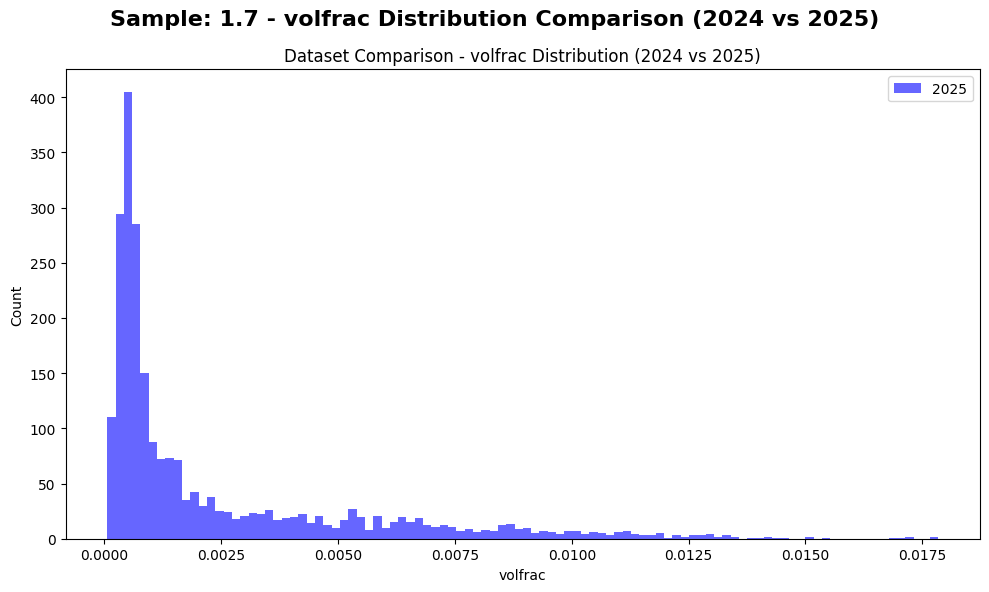

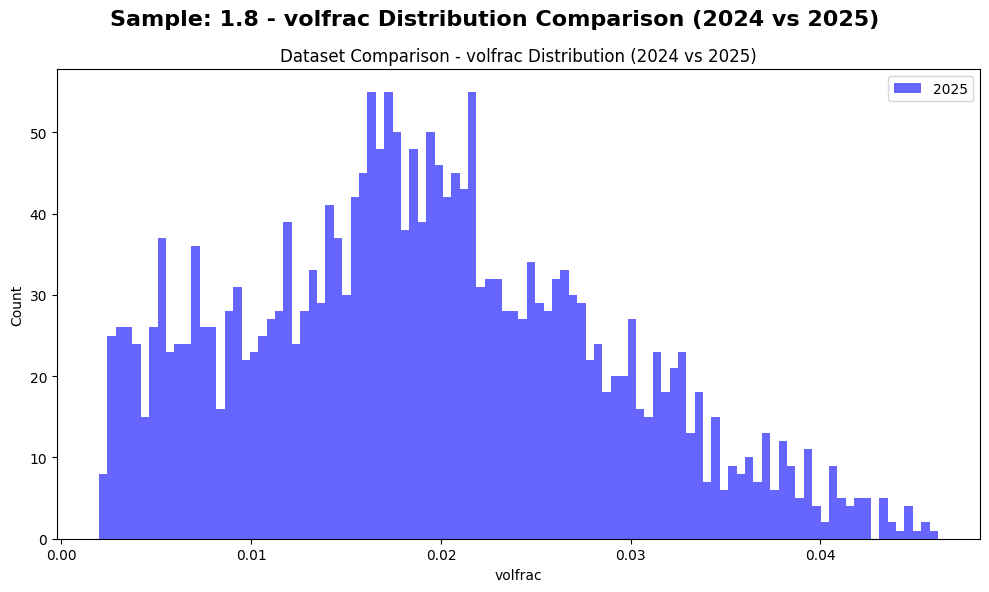

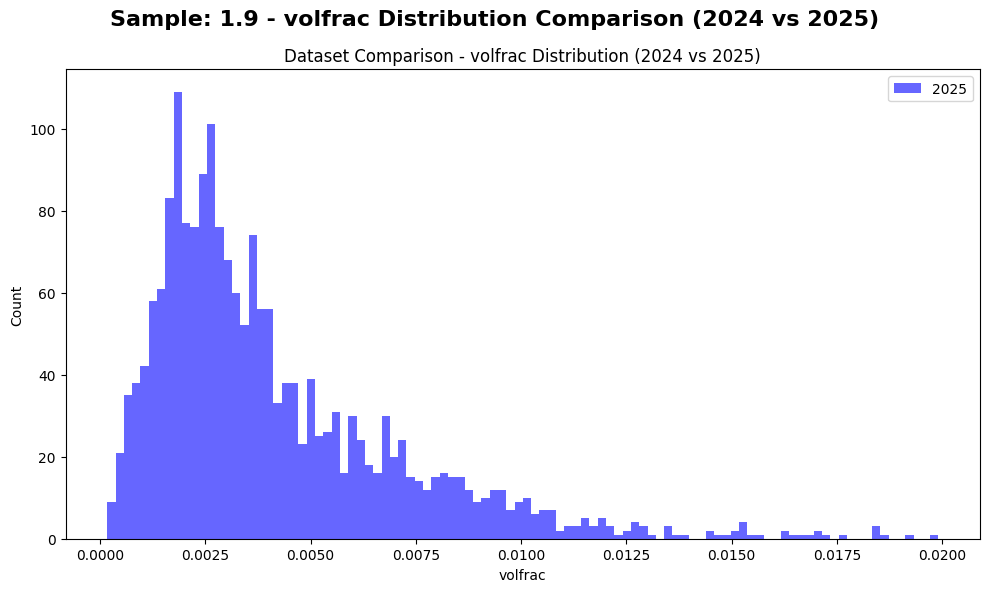

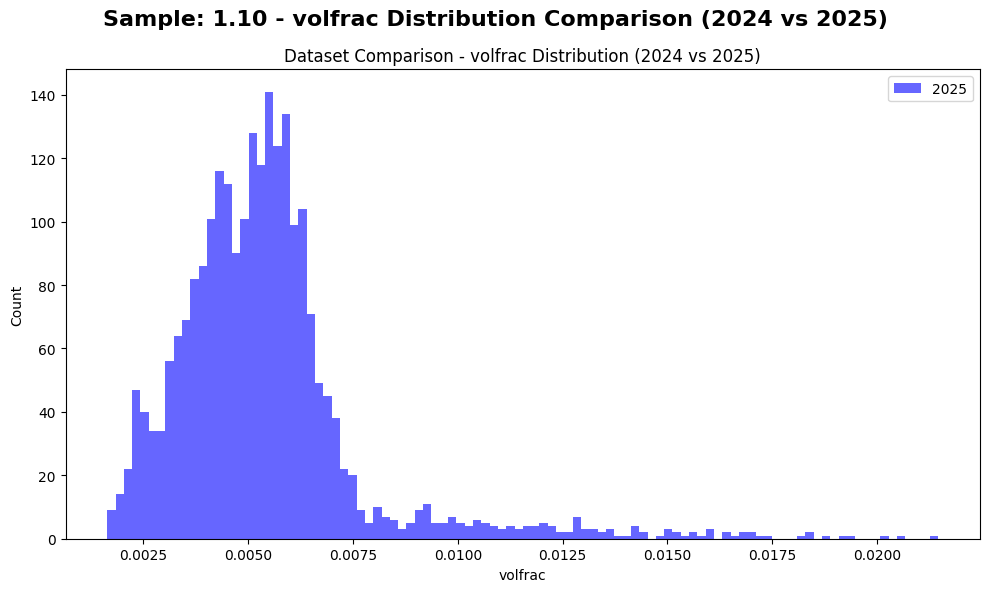

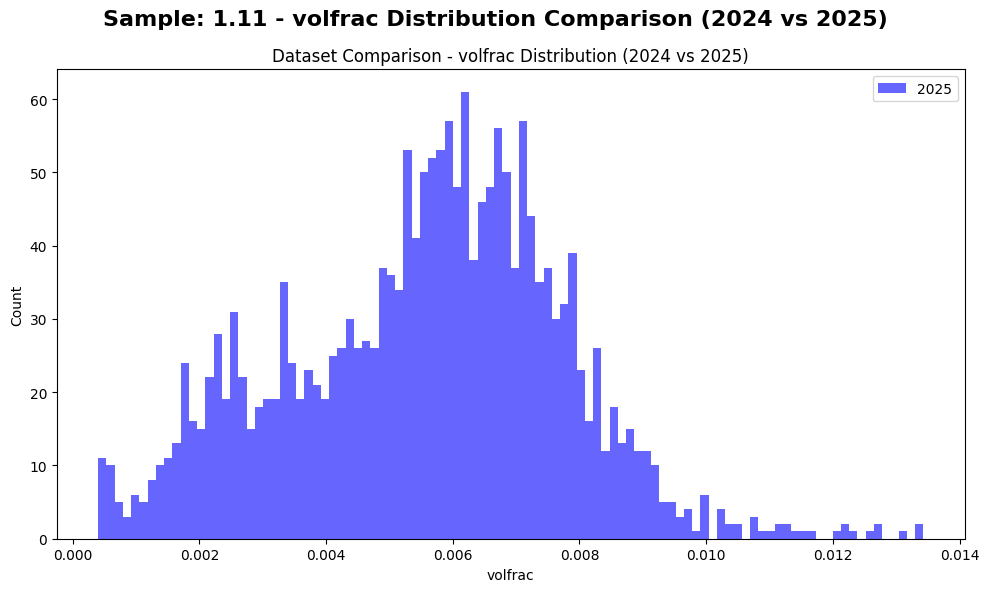

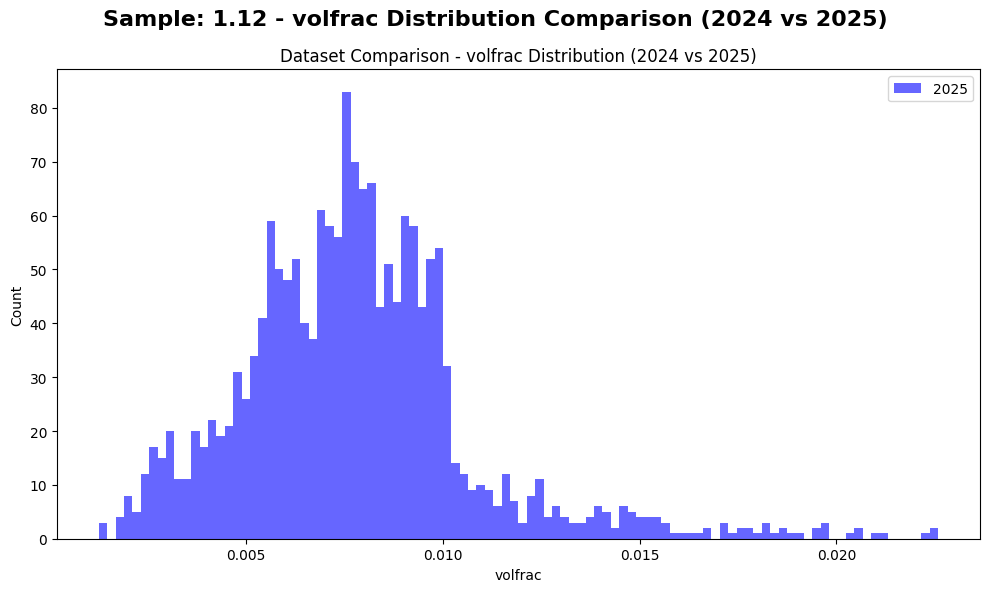

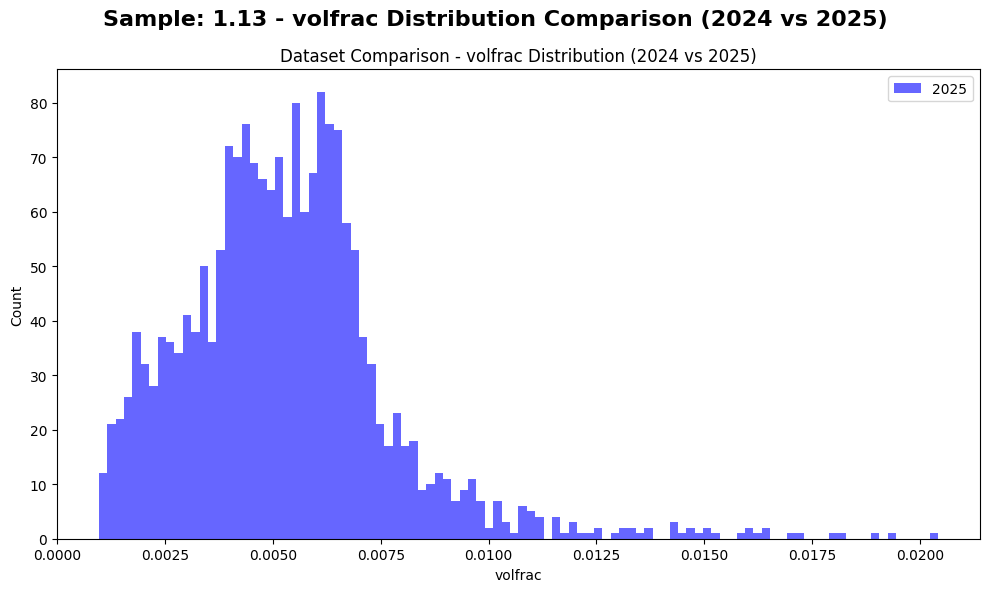

In [54]:
for i in range(len(sample_names)):
    sample_name = sample_names[i]
    dataset = datasets[i]
    volfrac = dataset['volfrac'].values
    valid_indexes = np.where(volfrac != -1)[0]
    volfrac_valid = volfrac[valid_indexes]
    mean = np.mean(volfrac_valid)
    std = np.std(volfrac_valid, ddof=1)

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    # Add super title for the whole figure
    fig.suptitle(f'Sample: {sample_name} - volfrac Distribution Comparison (2024 vs 2025)', 
                 fontsize=16, fontweight='bold')

    # Plot both histograms on the same axis
    ax.hist(volfrac[valid_indexes], bins=100, alpha=0.6, color='blue', label='2025', density=False)
    
    ax.set_xlabel('volfrac')
    ax.set_ylabel('Count')
    ax.set_title('Dataset Comparison - volfrac Distribution (2024 vs 2025)')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# UT comparison

In [55]:
ut = []

for i in range(len(sample_names)):

    ut.append(datasets[i].iloc[:, 0:-2].values)

ut = np.concat(ut, axis=0)

In [56]:
patch_size = 7
signal_len = ut.shape[1] // (patch_size**2)

ut = ut.reshape(-1, patch_size**2,signal_len)

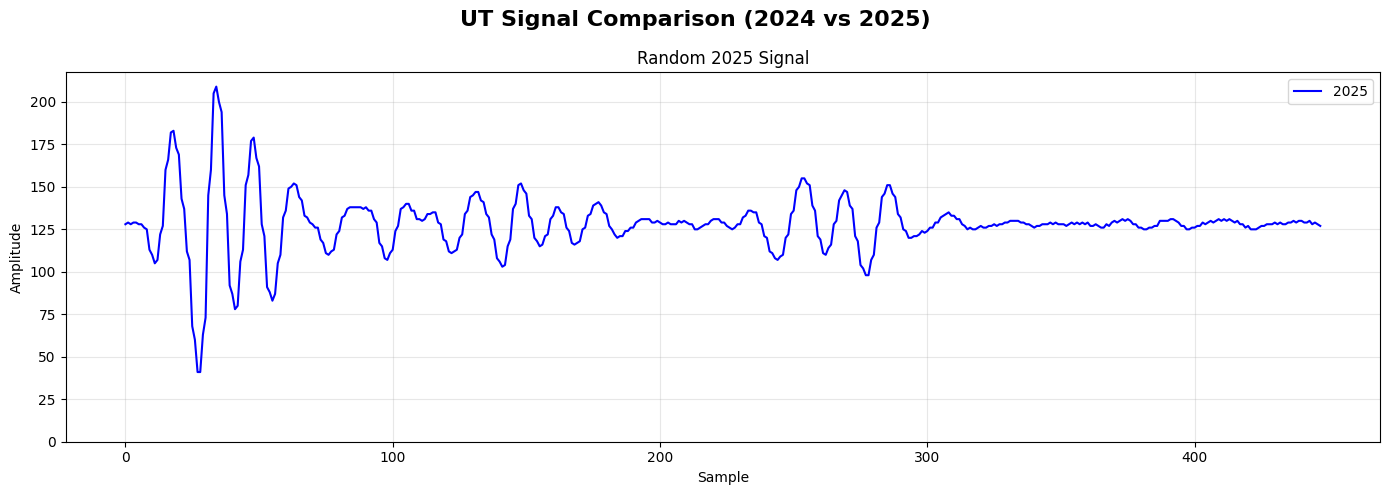

In [72]:
signal = ut[np.random.randint(0, ut.shape[0]),(patch_size**2)//2,:]

fig, ax1 = plt.subplots(1, 1, figsize=(14, 5))

# Add super title for the whole figure
fig.suptitle('UT Signal Comparison (2024 vs 2025)', 
             fontsize=16, fontweight='bold')

# Plot 2025 signal
ax1.plot(signal, color='blue', linewidth=1.5, label='2025')
ax1.set_title('Random 2025 Signal')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Make y-axes consistent for better comparison
max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
min_y = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
ax1.set_ylim(min_y, max_y)

plt.tight_layout()
plt.show()

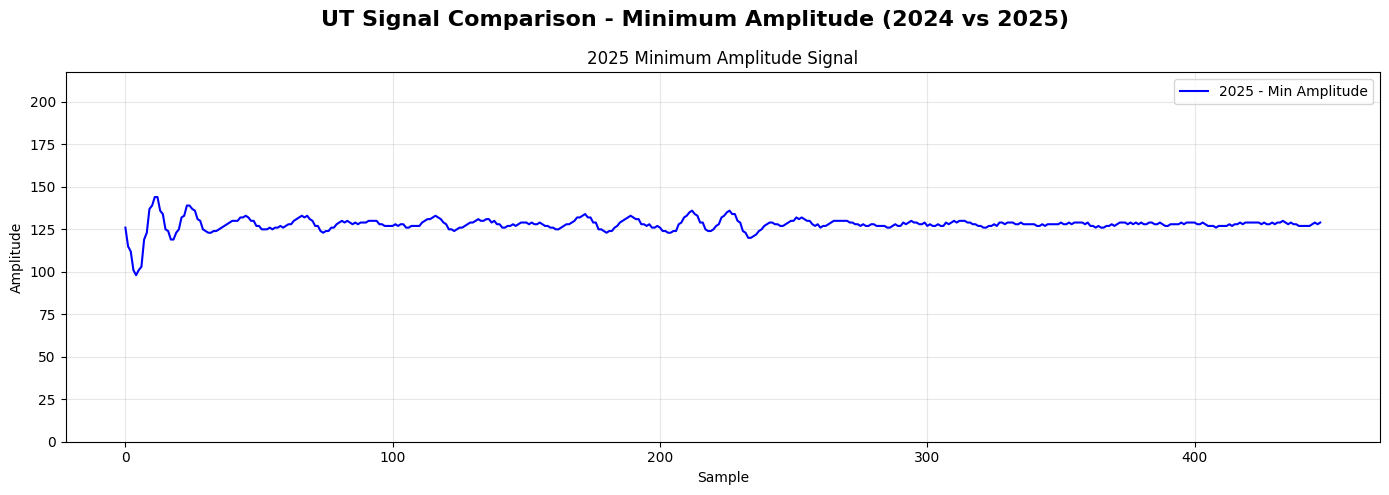

In [74]:
max = np.max(ut[:,(patch_size**2)//2,:], axis=-1)

min_signal = ut[np.argmin(max),(patch_size**2)//2,:]

fig, ax1 = plt.subplots(1, 1, figsize=(14, 5))
# Add super title for the whole figure
fig.suptitle('UT Signal Comparison - Minimum Amplitude (2024 vs 2025)', 
             fontsize=16, fontweight='bold')
# Plot 2025 minimum signal
ax1.plot(min_signal, color='blue', linewidth=1.5,
            label='2025 - Min Amplitude')
ax1.set_title('2025 Minimum Amplitude Signal')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True, alpha=0.3)
# Make y-axes consistent for better comparison
ax1.set_ylim(min_y, max_y)
plt.tight_layout()
plt.show()

# 2025 reconstruction

## Load reconstruction shape

In [75]:
reconstruction_shapes = []

for idx, row in datasets_table.iterrows():
    if row['patch_size_dataset'] != '7 pixels':
        continue
    reconstruction_shape = row['reconstruction_shape_dataset']
    reconstruction_shape = tuple(int(x.strip()) for x in reconstruction_shape.split('pixels')[0].strip('() ').split(','))
    # Append the reconstruction shape to the list
    reconstruction_shapes.append(reconstruction_shape)

## Ut reconstruction

In [76]:
sample_name = '1.7'

df_selected = datasets[np.where(np.array(sample_names) == sample_name)[0][0]]
reconstruction_shape = reconstruction_shapes[np.where(np.array(sample_names) == sample_name)[0][0]]

ut_selected = df_selected.iloc[:, 0:-2].values
patch_size = 7
signal_len = ut_selected.shape[1] // (patch_size**2)
ut_selected = ut_selected.reshape(-1, patch_size**2, signal_len)

ut_volumen = ut_selected[:, (patch_size**2)//2, :]
ut_volumen = ut_volumen.reshape(reconstruction_shape[0],reconstruction_shape[1], signal_len)

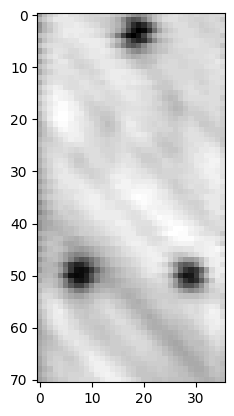

In [77]:
plt.imshow(ut_volumen.max(axis=-1), cmap='gray')

## XCT reconstruction

In [78]:
df_selected = datasets[np.where(np.array(sample_names) == sample_name)[0][0]]
reconstruction_shape = reconstruction_shapes[np.where(np.array(sample_names) == sample_name)[0][0]]

volfrac_selected = df_selected['volfrac'].values

volfrac_selected = volfrac_selected.reshape(reconstruction_shape)

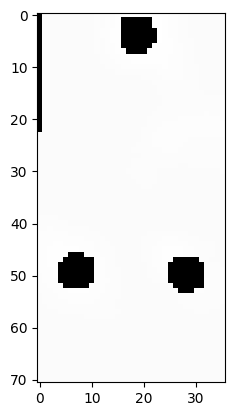

In [79]:
plt.imshow(volfrac_selected, cmap='gray')